In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg
from shapely.geometry import Point

# Analysis of all Parks in Long Island City
* Reads relevant csv files: parks in Long Island City and all events with necessary information
* LIC parks chosen according to boundary outlined in a previous email
* Merges Long Island City parks with event information to isolate only the needed event information

In [2]:
lic= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Neighborhood Specific Parks\lic.shp")
#Reads a csv of long island city parks
events= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\eventorg.csv",index_col=0)
#Dataframe with all events (descriptive categories, locations, and event organizers)

In [3]:
lic[['GISPROPNUM','SIGNNAME']]
#Long Island City Parks

,GISPROPNUM,SIGNNAME
0,Q104,Queensbridge Park
1,Q471,Hunter's Point South Park
2,Q470,A.R.R.O.W. Field House
3,Q296,Playground Thirty Five XXXV
4,Q333,Ravenswood Playground
5,Q045,Andrews Grove
6,Q218,Dutch Kills Playground
7,Q429,Spirit Playground
8,Q340,Torsney Playground
9,Q141,Murray Playground


In [4]:
events['GISPROPNUM']=events['park_id']
lic_events= pd.merge(events,lic,on='GISPROPNUM',how='right')
#Merge between event data and LIC parks.

# In Depth Park Analysis
## Basic Structure
The analysis structure is the same for all parks, with different observations included for each.

* Extracts the park, creating variables for the name and acreage.
* Creates a temporary dataframe for the park
* Computes the average number of events per year, the total number of events for all years (excluding 2019), and the average number of uniquely titled events.
* Computes the number of uniquely titled events that occured more than once.
* Computes the total number of uniquely titled events.
* Displays the mostly frequently used descriptive categories as both a tbale and a graph.
* Displays all the events, with a focus on the first and last year of event data, to analyze qualitatively the scope of programming.
* Analyzes stakeholder information to discern the local and nonlocal stakeholder share, and (the number of events)/(the number of stakeholders), i.e. events per stakeholder.

In [5]:
name= lic[['SIGNNAME','ACRES']].iloc[0,0]
acres= lic[['SIGNNAME','ACRES']].iloc[0,1]

## 1 {{name}}

In [6]:
t= lic_events.loc[lic_events['GISPROPNUM']==lic.iloc[0,0]]
t.loc[:,'date2']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t.loc[:,'year']= t.loc[:,'date2'].dt.year
t= t.loc[t['year']!=2019]
numev= t[~t.duplicated('event_id')].shape[0] #Number of events by the unique event id.
#Creates a temporary dataframe for all events located to the specific park.

C:\Users\raphael\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\raphael\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().mean()
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).mean(axis=0)
#Counts the number of uniquely titled events

In [8]:
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[[2013,2014,2015,2016,2017]]>1].count().reset_index()
duplevavg= y[y[[2013,2014,2015,2016,2017]]>1].count().mean()
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[4,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

### Initial Summary

The first park analyzed in the Long Island City neighborhood is {{name}}. {{name}} has {{acres}} acres. The number of events it hosts on average per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. On average per year it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. Of these uniquely titled events, on average {{np.around(duplevavg,decimals=2)}} occurred more than once. To be specific, in 2013 there was {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in 2018 there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [9]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2013,11
1,2014,9
2,2015,3
3,2016,4
4,2017,3


In [10]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2013,12
1,2014,10
2,2015,3
3,2016,4
4,2017,3


In [11]:
duplev
#Events that Repeat by Year

,year,0
0,2013,1
1,2014,1
2,2015,0
3,2016,0
4,2017,0


In [12]:
uniqev= t[~t.duplicated('title')].shape[0]
uniqev
#The total number of uniquely titled events

27

In [13]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)
#Most used event categories

,index,category
0,City Parks Foundation,19
1,SummerStage,17
2,Concerts,13
3,Free Summer Concerts,13
4,Best for Kids,10
5,Volunteer,10
6,It's My Park,10
7,Dance,3
8,Theater,2
9,Games,2


* Top ten categories used to describe events (above)
* Bar chart of all categories used to describe events (below)

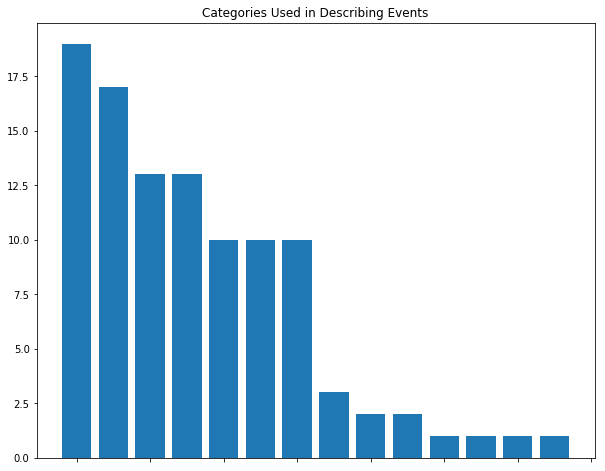

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom=False)
plt.title('Categories Used in Describing Events')
plt.show()

By title, there are {{uniqev}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. As the table above demonstrates, most of these events fall under the descriptive categories: 
* {{table.iloc[0,0]}}
* {{table.iloc[1,0]}}
* {{table.iloc[2,0]}}
* {{table.iloc[3,0]}}
* {{table.iloc[4,0]}}
* {{table.iloc[5,0]}}
* {{table.iloc[6,0]}}
* {{table.iloc[7,0]}}

### Analysis of event content
* Types of events in the first and last year
* Overall: types of events

In [15]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
618,2013,74092.0,CityParks PuppetMobile Presents Little Red's Hood,"<p class=""mti_font_element"">\t<em class=""mti_f...",Little Red's Hood is a fresh retelling of the ...
554,2013,69743.0,DANCE IQUAIL! / Master Class by: Karisma Jay,<p>\t7:00 PM &ndash; All Levels Open Dance Mas...,DANCE IQUAIL! will feature a sizzling program ...
564,2013,69746.0,"DJ D-Nice / 25th Anniversary Screening of ""I'm...",<p>\tAt the intersection of music and technolo...,"At the intersection of music and technology, D..."
580,2013,69739.0,Das EFX / Special Ed / Chubb Rock / Black Shee...,"<p>\tConsisting of Skoob and Krazy Drayzy, Das...","Black Sheep is a Hip-Hop duo from Queens, New ..."
632,2013,69738.0,Force MDs / Horace Brown / Jeff Redd / Marley ...,"<p>\tNew York born and bred, <strong>The Force...","New York born and bred, The Force MDs began th..."
540,2013,77871.0,It's My Park Day at Queensbridge Park,Volunteer with the Friends of Queensbridge Par...,Volunteer with the Friends of Queensbridge Par...
609,2013,69736.0,Meli'sa Morgan / Fonda Rae / Alicia Myers / Ma...,<p>\tNew York soul songstress <strong>Meli&#39...,New York soul songstress Meli'sa Morgan began ...
594,2013,69745.0,Queens Family Day Featuring: Invincible: A Tri...,<p>\t<strong><em>SummerStage Kids </em></stron...,SummerStage Kids presented by Disney presents ...
627,2013,69740.0,Rennie Harris Collective Inc. / Master Class b...,<p>\t7:00 PM &ndash; All Levels Open Dance Mas...,"Versed in urban dance styles such as Popping, ..."
613,2013,72759.0,SummerStage Kids Presents: Dirty Sock Funtime ...,<p>\tThe&nbsp;<strong>Dirty Sock Funtime Band<...,"The Dirty Sock Funtime Band is a wild, technic..."


In [16]:
y2013= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2013,axis=1,ascending=False).iloc[0,0:10]
y2013= y2013.reset_index()
y2013

,title,2013
0,It's My Park Day at Queensbridge Park,2.0
1,CityParks PuppetMobile Presents Little Red's Hood,1.0
2,DANCE IQUAIL! / Master Class by: Karisma Jay,1.0
3,"DJ D-Nice / 25th Anniversary Screening of ""I'm...",1.0
4,Das EFX / Special Ed / Chubb Rock / Black Shee...,1.0
5,Force MDs / Horace Brown / Jeff Redd / Marley ...,1.0
6,Meli'sa Morgan / Fonda Rae / Alicia Myers / Ma...,1.0
7,Queens Family Day Featuring: Invincible: A Tri...,1.0
8,Rennie Harris Collective Inc. / Master Class b...,1.0
9,SummerStage Kids Presents: Dirty Sock Funtime ...,1.0


In [17]:
y2017= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2017,axis=1,ascending=False).iloc[4,0:3]
y2017= y2017.reset_index()
y2017

,title,2017
0,CANCELLED: It's My Park at Queensbridge Park,1.0
1,CityParks PuppetMobile presents Cinderella Sam...,1.0
2,It's My Park at Queensbridge Park - Spring Cle...,1.0


Overall, events range from a music and dance performances (or even workshops?) to Field Days and "It's My Park" events. For context, "It's My Park" events are volunteer celebrations of public parks. Activities include mulching, painting, cleaning, weeding, and planting ("Volunteer: It's My Park," City Parks Foundation).

In 2013, few events repeated except for an "It's My Park Day." However, there were many dance and music concerts, including several Master Class workshops and SummerStage concerts. In recent years (i.e. 2016 and 2017), SummerStage concerts do not appear to be happening. However, in 2017 there was a CityParks PuppetMobile event, presumably a puppet show for young people.

In [18]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table
#Stakeholders by uniquely titled events

,index,event_organizer
0,City Parks Foundation,19
1,Friends of Queensbridge Park Committee,3
2,Green Shores NYC,1
3,Growing Up Green Charter School,1
4,NYC Parks: Queens Recreation,1


In [19]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,City Parks Foundation,19
1,Friends of Queensbridge Park Committee,5
2,Green Shores NYC,2
3,Partnerships for Parks,1
4,NYC Compost Project hosted by Big Reuse Green ...,1
5,Growing Up Green Charter School,1
6,NYC Parks: Queens Recreation,1


The most prominent event organizer is {{table.iloc[0,0]}}. According to their website, {{table.iloc[0,0]}} is an organization "dedicated to invigorating and transforming parks into dynamic, vibrant centers of urban life through sports, arts, community building and education programs for all New Yorkers." It serves more than 400 city parks, recreation centers, and public schools.

The second most prominent event organizers are more local: {{table.iloc[1,0]}}, {{table.iloc[2,0]}}, {{table2.iloc[4,0]}}, and {{table2.iloc[5,0]}} it seems to be one of the few local organizers.

### Analysis of local and nonlocal stakeholders

In [50]:
nonloc= [0,4,6] #based off of organizations that do not have Van Cortlandt Park in their name
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= len(table2)

In [53]:
uniqorg

14

* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [21]:
name= lic[['SIGNNAME','ACRES']].iloc[1,0]
acres= lic[['SIGNNAME','ACRES']].iloc[1,1]

## 2 {{name}}

In [55]:
t= lic_events[lic_events['GISPROPNUM']==lic.iloc[1,0]]
t.loc[:,'date2']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t.loc[:,'year']= t.loc[:,'date2'].dt.year
t= t[t['year']!=2019]
numev= t[~t.duplicated('event_id')].shape[0] #Number of events by the unique event id.
#Creates a temporary dataframe for all events located to the specific park.

C:\Users\raphael\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\raphael\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().mean()
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).mean(axis=0)
#Counts the number of uniquely titled events

In [24]:
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[[2014,2015,2016,2017]]>1].count().reset_index()
duplevavg= y[y[[2014,2015,2016,2017]]>1].count().mean()
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[4,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

### Initial Summary

This next park is {{name}}. {{name}} has {{acres}} acres. The number of events it hosts on average per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. On average per year it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. Of these uniquely titled events, on average {{np.around(duplevavg,decimals=2)}} occurred more than once. 


To be specific, in 2013 there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in 2018 there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [25]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2014,3
1,2015,16
2,2016,13
3,2017,11
4,2018,17


In [26]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2014,3
1,2015,17
2,2016,13
3,2017,11
4,2018,81


In [27]:
duplev
#Events that Repeat

,year,0
0,2014,0
1,2015,1
2,2016,0
3,2017,0
4,2018,0


In [28]:
uniqev= t[~t.duplicated('title')].shape[0]
uniqev
#The total number of uniquely titled events

59

In [29]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)
#Most used event categories

,index,category
0,Waterfront,120
1,Fitness,58
2,Outdoor Fitness,57
3,Accessible,31
4,Film,29
5,Free Summer Movies,29
6,Best for Kids,29
7,Astronomy,20
8,Concerts,12
9,Dance,11


* Top ten categories used to describe events (above)
* Bar chart of all categories used to describe events (below)

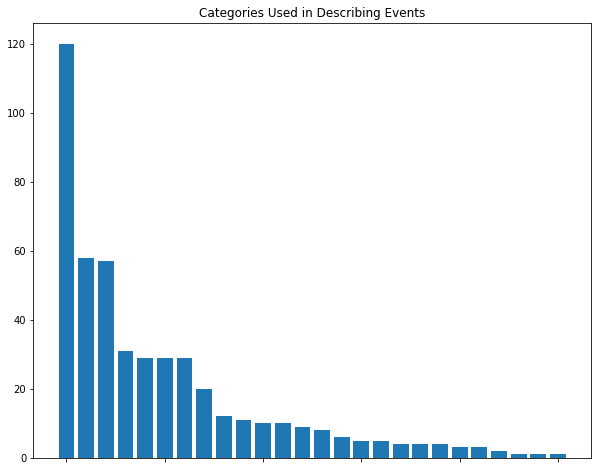

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom=False)
plt.title('Categories Used in Describing Events')
plt.show()

By title, there are {{uniqev}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. Most events, {{table.iloc[0,1]}}, are categorized as {{table.iloc[0,0]}}. The next two most frequently used categories are {{table.iloc[1,0]}} and {{table.iloc[2,0]}}. It seems that events are split between evening entertainment (movies, concerts or dance events) and outdoor fitness activities. The descriptive categories are as follows: 
* {{table.iloc[0,0]}}
* {{table.iloc[1,0]}}
* {{table.iloc[2,0]}}
* {{table.iloc[3,0]}}
* {{table.iloc[4,0]}}
* {{table.iloc[5,0]}}
* {{table.iloc[6,0]}}
* {{table.iloc[7,0]}}

### Analysis of event content
* Types of events in the first and last year
* Overall: types of events

In [31]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
21,2014,93289.0,It's My Park Day at Hunter's Point South Park,Please join the Hunters Point Park Conservancy...,Please join the Hunters Point Park Conservancy...
35,2014,100948.0,It's My Park Day at Hunters Point Park,"<p>On It&#39;s My Park Day, volunteer with the...","On It's My Park Day, volunteer with the Hunter..."
424,2014,98527.0,Summer Sounds: Sean Nowell and the Kung Fu Mas...,<p>Bring a chair or blanket and enjoy an eveni...,Bring a chair or blanket and enjoy an evening ...
286,2015,113798.0,"Arts, Culture & Fun: Dance Away the Night! Tango","<p>Always wanted to visit Argentina, the land ...","Enjoy everything tango: dance classes, demonst..."
44,2015,113285.0,Breakfast at Tiffany's,<p>Hunters Point Parks Conservancy and the rea...,The movie is about a flighty young New York so...
351,2015,117505.0,CANCELLED: CinemaLIC: Annie Hall,"<p class=""alert alert-error"">Please note: this...",Enjoy Annie Hall right on the waterfront in Lo...
364,2015,116036.0,CANCELLED: Music in the Park: Mayte Vicens,"<p class=""alert alert-error"">Please note: this...",Bring a chair or blanket and join us for an ev...
190,2015,113286.0,Hunters Point Park South Movie: E.T.,<p>Hunters Point Parks Conservancy and the rea...,The movie is about an extraterrestrial that is...
37,2015,120063.0,It's My Park at Hunter's Point South Park,"<p>This It&#39;s My Park season, volunteer wit...","This It's My Park season, volunteer with the H..."
119,2015,113254.0,King Kong (1933),<p>Hunters Point Parks Conservancy and the rea...,Watch this giant ape scale the Empire State Bu...


In [32]:
y1= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2014,axis=1,ascending=False).iloc[0,0:3]
y1= y1.reset_index()
y1

,title,2014
0,It's My Park Day at Hunter's Point South Park,1.0
1,It's My Park Day at Hunters Point Park,1.0
2,Summer Sounds: Sean Nowell and the Kung Fu Mas...,1.0


In [33]:
y2= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2018,axis=1,ascending=False).iloc[4,0:10]
y2= y2.reset_index()
y2

,title,2018
0,Free Waterfront Yoga,31.0
1,lululemon Summer of Yoga,13.0
2,Free Waterfront Zumba,9.0
3,Stargazing on the Waterfront,7.0
4,Watercolors on the Waterfront,6.0
5,Stargazing on the Waterftont,3.0
6,LIC Henge,2.0
7,Free Sunset Silent Disco,1.0
8,3rd Annual LIC Post Waterfront 5K,1.0
9,"Arts, Culture & Fun: Dance Away the Night with...",1.0


Overall, events range from "It's My Park" events to Tango classes and "Cinema LIC Outdoor Movie"--an event that repeats multiple times with different movies.

In 2013, few events occurred except for two "It's My Park Day" events and {{y1.iloc[2,0]}}. In 2018, there were more outdoor recreation activities, such as {{y2.iloc[0,0]}} and {{y2.iloc[1,0]}} -- both of which happened quite frequently throughout the year. Aside from {{y2.iloc[4,0]}} and {{y2.iloc[3,0]}}, most of the events are geared towards active recreation.

In [34]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table
#Stakeholders by uniquely titled events organized

,index,event_organizer
0,Hunters Point Parks Conservancy,5
1,CinemaLIC,4
2,"Arts, Culture & Fun",4
3,Queens Recreation,4
4,Lincoln Center,2
5,Hunters Point Park Conservancy,2
6,Amateur Astronomers Association of New York,2
7,Hunter Point Park Conservancy,2
8,Art & Antiquities,1
9,NYC Parks: Queens Recreation,1


In [35]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,Hunters Point Parks Conservancy,44
1,Amateur Astronomers Association of New York,7
2,Queens Recreation,4
3,CinemaLIC,4
4,"Arts, Culture & Fun",4
5,Hunters Poinr Parks Conservancy,4
6,Hunter Point Park Conservancy,3
7,Lincoln Center,2
8,Hunters Point Park Conservancy,2
9,NYC Parks: Queens Recreation,1


When taking into account all misspellings, the most prominent event organizer is {{table2.iloc[0,0]}}, notably a local organization.

Other prominent event organizers are city-wide organizations: {{table2.iloc[1,0]}}, {{table2.iloc[2,0]}}. However, both {{table.iloc[3,0]}}, {{table2.iloc[4,0]}}, and {{table2.iloc[9,0]}} are local.

### Analysis of local and nonlocal stakeholders

In [54]:
nonloc= [1,2,8,12,13] #based off of organizations that do not have Queens/LIC in their name or mission
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= len(table2)

* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [37]:
name= lic[['SIGNNAME','ACRES']].iloc[2,0]
acres= lic[['SIGNNAME','ACRES']].iloc[2,1]

## 3 {{name}}

In [38]:
t= lic_events[lic_events['GISPROPNUM']==lic.iloc[2,0]]
t.loc[:,'date2']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t.loc[:,'year']= t.loc[:,'date2'].dt.year
t= t[t['year']!=2019]
numev= t[~t.duplicated('event_id')].shape[0] #Number of events by the unique event id.
#Creates a temporary dataframe for all events located to the specific park.

C:\Users\raphael\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\raphael\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()/6
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).sum()/6
#Counts the number of uniquely titled events

In [40]:
yrrange= t['year'].unique().tolist()
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[yrrange]>1].count().reset_index()
duplevavg= y[y[yrrange]>1].count().sum()/6
duplev13= duplev.iloc[0,1] #Repeating events in the first year of the event data
duplev18= duplev.iloc[-1,1] #Repeating events in the last year of the event data
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

### Initial Summary

This next park is {{name}}. {{name}} has {{acres}} acres. The number of events it hosts on average per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. On average per year it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. Of these uniquely titled events, on average {{np.around(duplevavg,decimals=2)}} occurred more than once. 


To be specific, in {{yrrange[0]}} there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in {{yrrange[-1]}} there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [41]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2014,2
1,2015,2


In [42]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2014,2
1,2015,2


In [43]:
duplev
#Events that Repeat

,year,0
0,2014,0
1,2015,0


In [44]:
uniqev= t[~t.duplicated('title')].shape[0]
uniqev
#The total number of uniquely titled events

4

In [45]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)
#Most used event categories

,index,category
0,Film,5
1,Best for Kids,5
2,Movies Under the Stars,4
3,Free Summer Movies,2
4,Theater,1
5,City Parks Foundation,1
6,Education,1
7,"Arts, Culture & Fun Series",1


* Top ten categories used to describe events (above)
* Bar chart of all categories used to describe events (below)

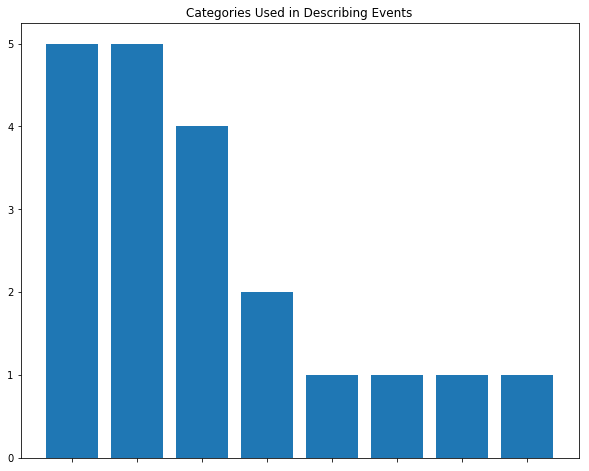

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom=False)
plt.title('Categories Used in Describing Events')
plt.show()

By title, there are {{uniqev}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. Most events, {{table.iloc[0,1]}}, are categorized as {{table.iloc[0,0]}}. The next two most frequently used categories are {{table.iloc[1,0]}} and {{table.iloc[2,0]}}. It seems that events are split between evening entertainment (movies, concerts or dance events) and outdoor fitness activities. The descriptive categories are as follows: 
* {{table.iloc[0,0]}}
* {{table.iloc[1,0]}}
* {{table.iloc[2,0]}}
* {{table.iloc[3,0]}}
* {{table.iloc[4,0]}}
* {{table.iloc[5,0]}}
* {{table.iloc[6,0]}}
* {{table.iloc[7,0]}}

### Analysis of event content
* Types of events in the first and last year
* Overall: types of events

In [47]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
641,2014,99599.0,"Arts, Culture & Fun: Screening of Documentary ...",<p>MAKERS is a six-part PBS series profiling t...,Women in Space traces the history of women pio...
658,2014,93333.0,CityParks PuppetMobile: Little Red’s Hood,<p>\t<em>Little Red&rsquo;s Hood</em>&nbsp;is ...,CityParks PuppetMobile Presents LITTLE RED’S HOOD
644,2015,116792.0,Movies Under the Stars: Enchanted,<p>Join NYC Parks&nbsp;and the New York City M...,Join NYC Parks and the New York City Mayor's O...
652,2015,120699.0,Movies Under the Stars: Hotel Transylvania,<p>Join NYC Parks&nbsp;and the New York City M...,Join NYC Parks and the New York City Mayor's O...


In [49]:
y1= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2014,axis=1,ascending=False).iloc[0,0:2]
y1= y1.reset_index()
y1

,title,2014
0,"Arts, Culture & Fun: Screening of Documentary ...",1.0
1,CityParks PuppetMobile: Little Red’s Hood,1.0


In [50]:
y2= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(yrrange[-1],axis=1,ascending=False).iloc[-1,0:2]
y2= y2.reset_index()
y2

,title,2015
0,Movies Under the Stars: Enchanted,1.0
1,Movies Under the Stars: Hotel Transylvania,1.0


Overall, programming at this park is mostly geared towards children--with puppet shows and children's movies.

Only two years of event data is listed: 2014 and 2015. In 2014, the two events were a documentary screening and a puppet s how. In 2015, the two events fell under the "Movies Under the Stars" initiative--a city-wide parks initiative to bring movies to local parks.

In [51]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table
#Stakeholders by uniquely titled events organized

,index,event_organizer
0,NYC Parks,2
1,City Parks Foundation,1
2,"Arts, Culture & Fun",1


In [52]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,NYC Parks,2
1,City Parks Foundation,1
2,"Arts, Culture & Fun",1


The most prominent event organizer is {{table2.iloc[0,0]}}. None of the event organizers are local.

### Analysis of local and nonlocal stakeholders

In [59]:
nonloc= [0,1,2] #based off of organizations that do not have Queens/LIC in their name or mission
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= len(table2)

* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [194]:
name= lic[['SIGNNAME','ACRES']].iloc[3,0]
acres= lic[['SIGNNAME','ACRES']].iloc[3,1]

## 4 {{name}}

In [195]:
t= lic_events.loc[lic_events['GISPROPNUM']==lic.iloc[3,0]]
t.loc[:,'date2']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t.loc[:,'year']= t.loc[:,'date2'].dt.year
t= t.loc[t['year']!=2019]
numev= t[~t.duplicated('event_id')].shape[0] #Number of events by the unique event id.
#Creates a temporary dataframe for all events located to the specific park.

In [62]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()/6
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).sum()/6
#Counts the number of uniquely titled events

In [63]:
yrrange= t['year'].sort_values().unique().tolist()
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[yrrange]>1].count().reset_index()
duplevavg= y[y[yrrange]>1].count().sum()/6
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[-1,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

### Initial Summary

This next park is {{name}}. {{name}} has {{acres}} acres. The number of events it hosts on average per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. On average per year it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. Of these uniquely titled events, on average {{np.around(duplevavg,decimals=2)}} occurred more than once. 


To be specific, in {{yrrange[0]}} there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in {{yrrange[-1]}} there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [64]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2015,1
1,2016,1
2,2017,1


In [65]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2015,1
1,2016,1
2,2017,1


In [66]:
duplev
#Events that Repeat

,year,0
0,2015,0
1,2016,0
2,2017,0


In [67]:
uniqev= t[~t.duplicated('title')].shape[0]
uniqev
#The total number of uniquely titled events

3

In [68]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)
#Most used event categories

,index,category
0,It's My Park,3
1,Volunteer,3


* Top ten categories used to describe events (above)
* Bar chart of all categories used to describe events (below)

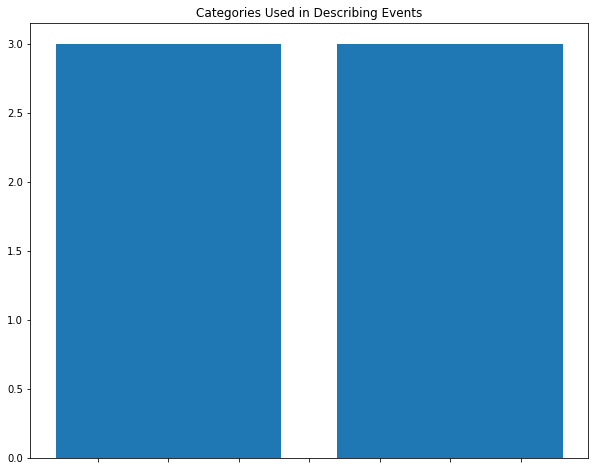

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom=False)
plt.title('Categories Used in Describing Events')
plt.show()

By title, there are {{uniqev}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. All events are categorized as both {{table.iloc[0,0]}} and {{table.iloc[1,0]}}.

### Analysis of event content
* Types of events in the first and last year
* Overall: types of events

In [70]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
536,2015,121149.0,It's My Park at Playground Thirty-Five XXXV,"<p>This It&#39;s My Park season, Partnerships ...","This It's My Park season, Partnerships for Par..."
534,2016,129814.0,CANCELLED: It's My Park at Playground Thirty F...,"<p class=""alert alert-error"">Please note: this...","This It's My Park season, volunteer with Commu..."
532,2017,146289.0,It's My Park at Playground Thirty Five - Sprin...,"<p>This It&#39;s My Park season, volunteer wit...",Volunteer with Assemblymember Barnwell's Offic...


In [71]:
y1= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(yrrange[0],axis=1,ascending=False).iloc[0,0:1]
y1= y1.reset_index()
y1.sort_values(2015)

,title,2015
0,It's My Park at Playground Thirty-Five XXXV,1.0


In [72]:
y2= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(yrrange[-1],axis=1,ascending=False).iloc[-1,0:1]
y2= y2.reset_index()
y2

,title,2017
0,It's My Park at Playground Thirty Five - Sprin...,1.0


Overall, programming at this park is minimal. The only types of events are "It's My Park" events.

In [73]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table
#Stakeholders by uniquely titled events organized

,index,event_organizer
0,Community Members for Playground 35,1
1,Office of Assemblymember Barnwell,1
2,Partnerships for Parks,1


In [74]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,Community Members for Playground 35,1
1,Office of Assemblymember Barnwell,1
2,Partnerships for Parks,1


Events are split between: {{table2.iloc[0,0]}}, {{table2.iloc[1,0]}}, and {{table2.iloc[2,0]}}. Two of the event organizers are local.

### Analysis of local and nonlocal stakeholders

In [75]:
nonloc= [0] #based off of organizations that do not have Queens/LIC in their name or mission
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= len(table2)

* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [76]:
name= lic[['SIGNNAME','ACRES']].iloc[4,0]
acres= lic[['SIGNNAME','ACRES']].iloc[4,1]

## 5 {{name}}

This 2.758-acre park also has no record of permitted events in the past six years. It does have a rich history dating back to 1833. The land once belonged to Colonel George Gibbs, a businessman from New York City. For many years, it was named Ravenscroft, after clergyman John Stark Ravenscroft, until it was renamed. Today, the park lies adjacent to the Ravenswood Houses and the Queensview Houses, two of the city’s largest housing projects. 

In [77]:
name= lic[['SIGNNAME','ACRES']].iloc[5,0]
acres= lic[['SIGNNAME','ACRES']].iloc[5,1]

## 6 {{name}}

There is no record of permitted events at {{name}} in the past six years.

In [196]:
name= lic[['SIGNNAME','ACRES']].iloc[6,0]
acres= lic[['SIGNNAME','ACRES']].iloc[6,1]

## 7 {{name}}

In [197]:
t= lic_events.loc[lic_events['GISPROPNUM']==lic.iloc[6,0]]
t.loc[:,'date2']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t.loc[:,'year']= t.loc[:,'date2'].dt.year
t= t.loc[t['year']!=2019]
numev= t[~t.duplicated('event_id')].shape[0] #Number of events by the unique event id.
#Creates a temporary dataframe for all events located to the specific park.

In [81]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()/6
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).sum()/6
#Counts the number of uniquely titled events

In [82]:
yrrange= t['year'].sort_values().unique().tolist()
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[yrrange]>1].count().reset_index()
duplevavg= y[y[yrrange]>1].count().sum()/6
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[-1,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

### Initial Summary

This next park is {{name}}. {{name}} has {{acres}} acres. The number of events it hosts on average per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. On average per year it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. Of these uniquely titled events, on average {{np.around(duplevavg,decimals=2)}} occurred more than once. 


To be specific, in {{yrrange[0]}} there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in {{yrrange[-1]}} there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [83]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2017,2
1,2018,1


In [84]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2017,2
1,2018,1


In [85]:
duplev
#Events that Repeat

,year,0
0,2017,0
1,2018,0


In [86]:
uniqev= t[~t.duplicated('title')].shape[0]
uniqev
#The total number of uniquely titled events

2

In [87]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)
#Most used event categories

,index,category
0,Best for Kids,3
1,School Break,2
2,Arts & Crafts,2
3,Accessible,2
4,History,1
5,Festivals,1
6,Dance,1
7,Food,1


* Top ten categories used to describe events (above)
* Bar chart of all categories used to describe events (below)

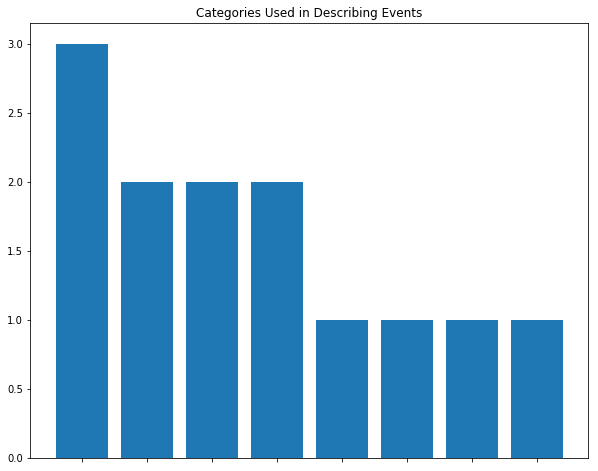

In [88]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom=False)
plt.title('Categories Used in Describing Events')
plt.show()

By title, there are {{uniqev}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. Most events are categorized as {{table.iloc[0,0]}}. The rest are categorized as:

* {{table.iloc[1,0]}}
* {{table.iloc[2,0]}}
* {{table.iloc[3,0]}}
* {{table.iloc[4,0]}}

### Analysis of event content
* Types of events in the first and last year
* Overall: types of events

In [89]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
664,2017,147946.0,Astoria's Multicultural Celebration,"<p>Enjoy costumes, dance and music that repres...",The Central Astoria Local Development Coalitio...
669,2017,144777.0,Spring Break Fun in the Park,<p>Everyone is welcome to this free event that...,Everyone is welcome to this free event that wi...
661,2018,163631.0,Spring Break Fun in the Park,<p>Central Astoria LDC is excited to bring you...,"There will be face painting, crafts, canvas pa..."


In [90]:
y1= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(yrrange[0],axis=1,ascending=False).iloc[0,0:3]
y1= y1.reset_index()
y1

,title,2017
0,Astoria's Multicultural Celebration,1.0
1,Spring Break Fun in the Park,1.0


In [91]:
y2= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(yrrange[-1],axis=1,ascending=False).iloc[-1,0:1]
y2= y2.reset_index()
y2

,title,2018
0,Spring Break Fun in the Park,1.0


Overall, programming at this park is minimal.

Only two years of event data is listed: {{yrrange[0]}} and {{yrrange[1]}}. In {{yrrange[0]}}, the two events were {{y1.iloc[0,0]}} and {{y1.iloc[1,0]}}. In {{yrrange[1]}}, the only event was {{y2.iloc[0,0]}}.

In [92]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table
#Stakeholders by uniquely titled events organized

,index,event_organizer
0,Central Astoria Local Development Coalition Inc.,2


In [93]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,Central Astoria Local Development Coalition Inc.,3


The only organizer is a local organization: {{table2.iloc[0,0]}}.

### Analysis of local and nonlocal stakeholders

In [94]:
nonloc= []
name= lic[['SIGNNAME','ACRES']].iloc[5,0]
acres= lic[['SIGNNAME','ACRES']].iloc[5,1] #based off of organizations that do not have Queens/LIC in their name or mission
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= len(table2)

* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [95]:
name= lic[['SIGNNAME','ACRES']].iloc[7,0]
acres= lic[['SIGNNAME','ACRES']].iloc[7,1]

## 8 {{name}}

There is no record of permitted events at {{name}}.

In [198]:
name= lic[['SIGNNAME','ACRES']].iloc[8,0]
acres= lic[['SIGNNAME','ACRES']].iloc[8,1]

## 9 {{name}}

In [199]:
t= lic_events[lic_events['GISPROPNUM']==lic.iloc[8,0]]
t.loc[:,'date2']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t.loc[:,'year']= t.loc[:,'date2'].dt.year
t= t[t['year']!=2019]
numev= t[~t.duplicated('event_id')].shape[0] #Number of events by the unique event id.
#Creates a temporary dataframe for all events located to the specific park.

In [101]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()/6
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).sum()/6
#Counts the number of uniquely titled events

In [102]:
yrrange= t['year'].sort_values().unique().tolist()
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[yrrange]>1].count().reset_index()
duplevavg= y[y[yrrange]>1].count().sum()/6
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[-1,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

### Initial Summary

This next park is {{name}}. {{name}} has {{acres}} acres. The number of events it hosts on average per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. On average per year it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. Of these uniquely titled events, on average {{np.around(duplevavg,decimals=2)}} occurred more than once. 


To be specific, in {{yrrange[0]}} there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in {{yrrange[-1]}} there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [103]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2014,1
1,2015,2
2,2016,2
3,2017,3
4,2018,1


In [104]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2014,1
1,2015,2
2,2016,2
3,2017,4
4,2018,1


In [105]:
duplev
#Events that Repeat

,year,0
0,2014,0
1,2015,0
2,2016,0
3,2017,1
4,2018,0


In [106]:
uniqev= t[~t.duplicated('title')].shape[0]
uniqev
#The total number of uniquely titled events

9

In [107]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)
#Most used event categories

,index,category
0,Best for Kids,7
1,Halloween,6
2,Free Summer Movies,3
3,Film,3
4,Movies Under the Stars,3
5,Nature,3
6,Sports,2
7,Games,2
8,Education,2
9,Arts & Crafts,1


* Top ten categories used to describe events (above)
* Bar chart of all categories used to describe events (below)

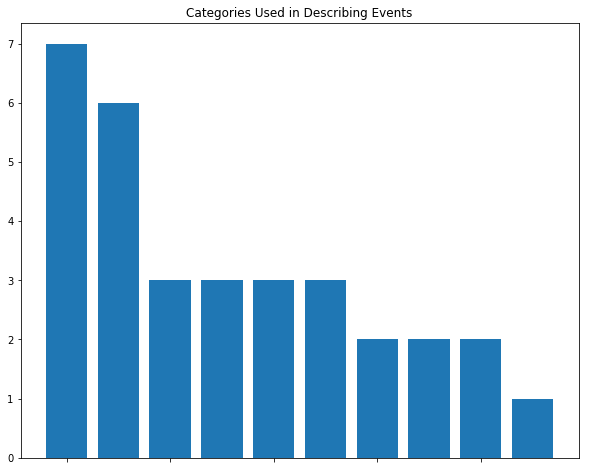

In [108]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom=False)
plt.title('Categories Used in Describing Events')
plt.show()

By title, there are {{uniqev}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. All events are categorized as both {{table.iloc[0,0]}} and {{table.iloc[1,0]}}.

### Analysis of event content
* Types of events in the first and last year
* Overall: types of events

In [109]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
520,2014,101549.0,Pumpkin Smash 2014,"<p>Bring your&nbsp;fall pumpkins, jack-o-lante...",You smash them and we'll compost them locally.
507,2015,121016.0,NYC Compost Project: Pumpkin Smash 2015,<p>You smash them&nbsp;and NYC Compost Project...,"Bring Pumpkins, Jack-o-Lanterns, and Gourds fo..."
490,2015,116425.0,Sports & Fitness Day at Torsney Playground,<p>Come join us for a day of sports activities...,Come join us for a day of sports activities su...
515,2016,134208.0,All About Volleyball,<p>Join&nbsp;us for an afternoon of soccer!&nb...,Join us for an afternoon of soccer! Activities...
494,2016,130320.0,Movies Under the Stars: Bolt,<p>Join NYC Parks and the New York City Mayor&...,Join NYC Parks and the New York City Mayor's O...
517,2017,151500.0,Movies Under the Stars: Beauty and the Beast,<p>Join NYC Parks&nbsp;and the New York City M...,Disney’s Beauty and the Beast is a live-action...
513,2017,156767.0,Pumpkin Smash 2017,"<p>Bring your pumpkins, jack-o-lanterns and go...","Bring your pumpkins, jack-o-lanterns and gourd..."
492,2017,152640.0,Water Olympics,<p>Join NYC Parks for a day of water-themed ac...,Join NYC Parks for a day of water-themed activ...
505,2018,179169.0,Pumpkin Smash 2018,"<p>Bring your pumpkins, jack-o-lanterns, and g...","Bring your pumpkins, jack-o-lanterns, and gour..."


In [110]:
y1= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(yrrange[0],axis=1,ascending=False).iloc[0,0:1]
y1= y1.reset_index()
y1

,title,2014
0,Pumpkin Smash 2014,1.0


In [111]:
y2= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(yrrange[-1],axis=1,ascending=False).iloc[-1,0:1]
y2= y2.reset_index()
y2

,title,2018
0,Pumpkin Smash 2018,1.0


Overall, programming at this park is minimal for the first and last years. However, in 2016 and 2017 there are more varied events: Water Olympics, Movies Under the Stars, and a Sports & Fitness Day for example.

In both {{yrrange[0]}} and {{yrrange[1]}}, the events were similar: {{y1.iloc[0,0]}} and {{y2.iloc[0,0]}}.

In [112]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table
#Stakeholders by uniquely titled events organized

,index,event_organizer
0,NYC Parks: Queens Recreation,4
1,NYC Zero Waste,1
2,"NYC Compost Project, funded by NYC Sanitation",1
3,Queens Recreation,1
4,Queens Botanical Garden,1


In [113]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,NYC Parks: Queens Recreation,5
1,NYC Zero Waste,1
2,"NYC Compost Project, funded by NYC Sanitation",1
3,Queens Recreation,1
4,Queens Botanical Garden,1


The top organizers appear to be local: {{table2.iloc[0,0]}} and {{table2.iloc[1,0]}}.

### Analysis of local and nonlocal stakeholders

In [114]:
nonloc= [3,4]
name= lic[['SIGNNAME','ACRES']].iloc[5,0]
acres= lic[['SIGNNAME','ACRES']].iloc[5,1] #based off of organizations that do not have Queens/LIC in their name or mission
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= len(table2)

* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [200]:
name= lic[['SIGNNAME','ACRES']].iloc[9,0]
acres= lic[['SIGNNAME','ACRES']].iloc[9,1]

## 10 {{name}}

In [201]:
t= lic_events.loc[lic_events['GISPROPNUM']==lic.iloc[9,0]]
t.loc[:,'date2']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t.loc[:,'year']= t.loc[:,'date2'].dt.year
t= t[t['year']!=2019]
numev= t[~t.duplicated('event_id')].shape[0] #Number of events by the unique event id.
#Creates a temporary dataframe for all events located to the specific park.

In [118]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()/6
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).sum()/6
#Counts the number of uniquely titled events

In [119]:
yrrange= t['year'].sort_values().unique().tolist()
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[yrrange]>1].count().reset_index()
duplevavg= y[y[yrrange]>1].count().sum()/6
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[-1,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

### Initial Summary

This next park is {{name}}. {{name}} has {{acres}} acres. The number of events it hosts on average per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. On average per year it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. Of these uniquely titled events, on average {{np.around(duplevavg,decimals=2)}} occurred more than once. 


To be specific, in {{yrrange[0]}} there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in {{yrrange[-1]}} there was {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [120]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2013,1
1,2017,2


In [121]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2013,1
1,2017,3


In [122]:
duplev
#Events that Repeat

,year,0
0,2013,0
1,2017,1


In [123]:
uniqev= t[~t.duplicated('title')].shape[0]
uniqev
#The total number of uniquely titled events

3

In [124]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)
#Most used event categories

,index,category
0,It's My Park,5
1,Volunteer,5


* Top ten categories used to describe events (above)
* Bar chart of all categories used to describe events (below)

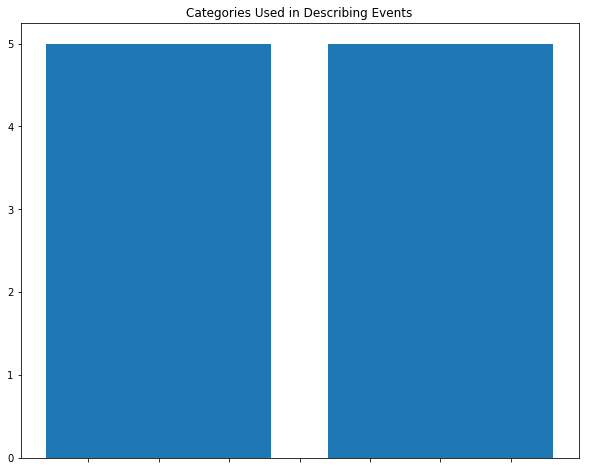

In [125]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom=False)
plt.title('Categories Used in Describing Events')
plt.show()

By title, there are {{uniqev}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. All events are categorized as both {{table.iloc[0,0]}} and {{table.iloc[1,0]}}.

### Analysis of event content
* Types of events in the first and last year
* Overall: types of events

In [126]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
526,2013,73135.0,It's My Park Day at John F. Murray Playground,"On It&#39;s My Park Day, join STOKED at John F...","On It's My Park Day, join STOKED at John F. Mu..."
522,2017,157449.0,CANCELLED: It's My Park at Murray Playground,"<p class=""alert alert-error"">Please note: this...","This It's My Park season, volunteer with Queen..."
524,2017,154594.0,It's My Park at Murray Playground,"<p>This It&#39;s My Park season, volunteer wit...","This It's My Park season, volunteer with Queen..."


In [127]:
y1= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(yrrange[0],axis=1,ascending=False).iloc[0,0:1]
y1= y1.reset_index()
y1

,title,2013
0,It's My Park Day at John F. Murray Playground,1.0


In [128]:
y2= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(yrrange[-1],axis=1,ascending=False).iloc[-1,0:2]
y2= y2.reset_index()
y2

,title,2017
0,It's My Park at Murray Playground,2.0
1,CANCELLED: It's My Park at Murray Playground,1.0


Overall, programming at this park is minimal and does not vary. There are only two years of data included.

In both {{yrrange[0]}} and {{yrrange[1]}}, the events were similar: {{y1.iloc[0,0]}} and {{y2.iloc[0,0]}}.

In [129]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table
#Stakeholders by uniquely titled events organized

,index,event_organizer
0,Queens Paideia School,2
1,Partnerships for Parks,1


In [130]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,Queens Paideia School,2
1,Murray Park Neighbors,1
2,Partnerships for Parks,1


Two of the three organizers appear to be local: {{table2.iloc[0,0]}} and {{table2.iloc[2,0]}}.

### Analysis of local and nonlocal stakeholders

In [131]:
nonloc= [1]
name= lic[['SIGNNAME','ACRES']].iloc[5,0]
acres= lic[['SIGNNAME','ACRES']].iloc[5,1] #based off of organizations that do not have Queens/LIC in their name or mission
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= len(table2)

* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [132]:
name= lic[['SIGNNAME','ACRES']].iloc[10,0]
acres= lic[['SIGNNAME','ACRES']].iloc[10,1]

## 11 {{name}}

There is no record of events at this park.

In [133]:
name= lic[['SIGNNAME','ACRES']].iloc[11,0]
acres= lic[['SIGNNAME','ACRES']].iloc[11,1]

## 12 {{name}}

There is no record of events at this park.

In [134]:
name= lic[['SIGNNAME','ACRES']].iloc[12,0]
acres= lic[['SIGNNAME','ACRES']].iloc[12,1]

## 13 {{name}}

There is no record of events at this park.

In [135]:
name= lic[['SIGNNAME','ACRES']].iloc[13,0]
acres= lic[['SIGNNAME','ACRES']].iloc[13,1]

## 14 {{name}}

There is no record of events at this park.

In [136]:
name= lic[['SIGNNAME','ACRES']].iloc[14,0]
acres= lic[['SIGNNAME','ACRES']].iloc[14,1]

## 15 {{name}}

There is no record of events at this park.

In [137]:
name= lic[['SIGNNAME','ACRES']].iloc[15,0]
acres= lic[['SIGNNAME','ACRES']].iloc[15,1]

## 16 {{name}}

There is no record of events at this park.

In [138]:
name= lic[['SIGNNAME','ACRES']].iloc[16,0]
acres= lic[['SIGNNAME','ACRES']].iloc[16,1]

## 17 {{name}}

There is no record of events at this park.

In [202]:
name= lic[['SIGNNAME','ACRES']].iloc[17,0]
acres= lic[['SIGNNAME','ACRES']].iloc[17,1]

## 18 {{name}}

In [203]:
t= lic_events[lic_events['GISPROPNUM']==lic.iloc[17,0]]
t.loc[:,'date2']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t.loc[:,'year']= t.loc[:,'date2'].dt.year
t= t[t['year']!=2019]
numev= t[~t.duplicated('event_id')].shape[0] #Number of events by the unique event id.
#Creates a temporary dataframe for all events located to the specific park.

In [141]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()/6
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).sum()/6
#Counts the number of uniquely titled events

In [142]:
yrrange= t['year'].sort_values().unique().tolist()
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[yrrange]>1].count().reset_index()
duplevavg= y[y[yrrange]>1].count().sum()/6
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[-1,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

### Initial Summary

This next park is {{name}}. {{name}} has {{acres}} acres. The number of events it hosts on average per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. On average per year it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. Of these uniquely titled events, on average {{np.around(duplevavg,decimals=2)}} occurred more than once. 


To be specific, in {{yrrange[0]}} there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in {{yrrange[-1]}} there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [143]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2015,1
1,2016,1
2,2017,1
3,2018,1


In [144]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2015,1
1,2016,4
2,2017,1
3,2018,1


In [145]:
duplev
#Events that Repeat

,year,0
0,2015,0
1,2016,1
2,2017,0
3,2018,0


In [146]:
uniqev= t[~t.duplicated('title')].shape[0]
uniqev
#The total number of uniquely titled events

3

In [147]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)
#Most used event categories

,index,category
0,Art,5
1,Seniors,5
2,Tours,4
3,It's My Park,2
4,Volunteer,2


* Top ten categories used to describe events (above)
* Bar chart of all categories used to describe events (below)

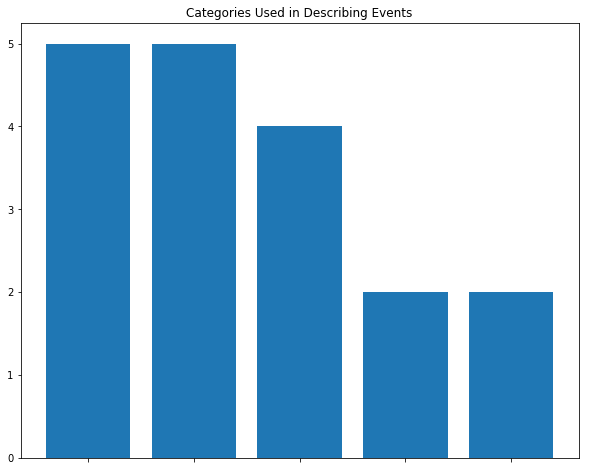

In [148]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom=False)
plt.title('Categories Used in Describing Events')
plt.show()

By title, there are {{uniqev}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. All events are categorized as both {{table.iloc[0,0]}} and {{table.iloc[1,0]}}.

### Analysis of event content
* Types of events in the first and last year
* Overall: types of events

In [149]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
16,2015,121040.0,Public Art Opening - Wendy Klemperer: Shadow M...,<p>Join NYC Parks for the opening reception of...,Join NYC Parks for the opening reception of We...
4,2016,127419.0,LIC Arts Open with Wendy Klemperer at Court Sq...,<p>Meet artist&nbsp;Wendy Klemperer at her pub...,Shadow Migration exhibits animal silhouettes c...
2,2017,153482.0,It's My Park at Court Square Park,"<p>This It&#39;s My Park season, volunteer wit...","This It's My Park season, volunteer with Court..."
0,2018,177167.0,It's My Park at Court Square Park,"<p>This It&#39;s My Park season, volunteer wit...",Volunteer with Court Square Civic Association ...


In [150]:
y1= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(yrrange[0],axis=1,ascending=False).iloc[0,0:1]
y1= y1.reset_index()
y1

,title,2015
0,Public Art Opening - Wendy Klemperer: Shadow M...,1.0


In [151]:
y2= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(yrrange[-1],axis=1,ascending=False).iloc[-1,0:1]
y2= y2.reset_index()
y2

,title,2018
0,It's My Park at Court Square Park,1.0


Overall, programming at this park is minimal except for a few un-repeating events. In 2015 and 2016, these events were both art openings for Wendy Klemperer. In 2017 and 2018, the only events were "It's My Park" events.

In [152]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table
#Stakeholders by uniquely titled events organized

,index,event_organizer
0,Art & Antiquities,2
1,Court Square Civic Association,1


In [153]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,Art & Antiquities,5
1,Court Square Civic Association,2


The top organizer is a city-wide parks agency (or initiative?). The other organization, {{table2.iloc[1,0]}}, is local.

### Analysis of local and nonlocal stakeholders

In [154]:
nonloc= [0]
name= lic[['SIGNNAME','ACRES']].iloc[5,0]
acres= lic[['SIGNNAME','ACRES']].iloc[5,1] #based off of organizations that do not have Queens/LIC in their name or mission
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= len(table2)

* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [155]:
name= lic[['SIGNNAME','ACRES']].iloc[18,0]
acres= lic[['SIGNNAME','ACRES']].iloc[18,1]

## 19 {{name}}

There is no record of events at {{name}}.

In [156]:
name= lic[['SIGNNAME','ACRES']].iloc[19,0]
acres= lic[['SIGNNAME','ACRES']].iloc[19,1]

## 20 {{name}}

There is no record of events at {{name}}.